## Part l: Understanding Regularization

__Q: What is regularization in the context of deep learning?__

__A:__ Regularization is a technique used in deep learning to prevent overfitting, which occurs when a model becomes too complex and memorizes the training data instead of learning general patterns. Regularization introduces additional constraints to the model during training, discouraging the model from fitting noise in the data and encouraging it to learn relevant features.

__Q: Why is regularization important?__

__A:__ Regularization is essential because it helps improve the generalization of deep learning models. Overfitting leads to poor performance on new, unseen data, making the model less useful for real-world applications. By using regularization techniques, we can control the model's complexity and improve its ability to generalize to unseen data.

__Q: Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff.__

__A:__ The bias-variance tradeoff is a fundamental concept in machine learning that deals with the tradeoff between bias and variance in a model. Bias refers to the error introduced by approximating a real-world problem with a simplified model, while variance refers to the model's sensitivity to fluctuations in the training data. High bias can result in underfitting, and high variance can lead to overfitting.

Regularization helps address the bias-variance tradeoff by adding a penalty term to the model's objective function. This penalty encourages the model to favor simpler solutions, reducing variance and preventing overfitting. At the same time, regularization allows the model to maintain enough flexibility to capture the underlying patterns in the data, preventing high bias and underfitting.

__Q: Describe the concept of L1 and L2 regularization. How do they differ in terms of penalty calculation and their effects on the model?__

A: L1 and L2 regularization are two common regularization techniques.

- L1 regularization (also known as Lasso regularization) adds the sum of the absolute values of the model's weights as a penalty term to the loss function. It results in some weights being exactly zero, effectively performing feature selection and making the model more interpretable. L1 regularization tends to lead to sparse weight matrices.

- L2 regularization (also known as Ridge regularization) adds the sum of the squares of the model's weights as a penalty term to the loss function. It does not lead to zeroing out weights completely but significantly reduces the magnitude of the weights. L2 regularization encourages the model to distribute the weights more evenly across all features.

In summary, L1 regularization is more suitable for feature selection and creating sparse models, while L2 regularization is effective in reducing the magnitude of the weights and creating more well-distributed models.

__Q: Discuss the role of regularization in preventing overfitting and improving the generalization of deep learning models.__

__A:__ Regularization plays a crucial role in preventing overfitting by adding constraints to the model's complexity during training. When a model is regularized, it becomes less prone to fitting noise and outliers in the training data, making it more robust to new, unseen data. Regularization achieves this by penalizing overly complex models, reducing the model's reliance on individual data points, and encouraging it to focus on learning general patterns.

By improving generalization, regularization helps deep learning models perform well on unseen data, making them more reliable and applicable to real-world tasks. It allows the model to capture essential patterns while avoiding overfitting, resulting in better performance on both the training and test datasets.

__Q: Explain Dropout regularization and how it works to reduce overfitting. Discuss the impact of Dropout on model training and inference.__

__A:__ Dropout regularization is a technique used to prevent overfitting in deep learning models. During training, Dropout randomly deactivates (sets to zero) a fraction of neurons in a layer with a specified probability. This means that during each training iteration, different subsets of neurons are dropped out, forcing the network to learn more robust and generalizable features.

The impact of Dropout on model training is that it introduces a form of model averaging. It prevents neurons from becoming overly dependent on each other, encouraging the network to learn more diverse representations. This helps prevent overfitting as the model is less likely to memorize specific patterns from the training data.

During inference (when making predictions), Dropout is typically turned off, and the entire network is used for prediction. However, to compensate for the increase in neuron activations during inference (as compared to training), the weights of the dropped-out neurons are scaled down by the dropout probability.

__Q: Describe the concept of Early Stopping as a form of regularization. How does it help prevent overfitting during the training process?__

__A:__ Early stopping is a regularization technique used during the training process to prevent overfitting. It involves monitoring the model's performance on a validation set during training. If the model's performance on the validation set stops improving or starts to degrade, training is stopped early, and the model with the best validation performance is saved.

Early stopping helps prevent overfitting by stopping the training process at an optimal point before the model starts to memorize the training data. When the model continues training beyond this point, it becomes too specific to the training data, leading to poor generalization on new data.

By using early stopping, we ensure that the model is at a point where it performs well on both the training and validation datasets, striking a balance between fitting the training data and generalizing to new data.

__Q:__ Explain the concept of Batch Normalization and its role as a form of regularization. How does Batch Normalization help in preventing overfitting?

A: Batch Normalization is a technique used in deep learning to stabilize and accelerate the training process. It normalizes the activations of each layer in a mini-batch, making the training more stable and allowing for higher learning rates.

Batch Normalization acts as a form of regularization by reducing internal covariate shift, which is the change in the distribution of layer inputs during training. By normalizing the activations, Batch Normalization helps prevent the model from becoming overly sensitive to small changes in the input distribution, thus improving generalization.

Additionally, Batch Normalization introduces some noise to the activations, similar to Dropout, which can act as a regularization effect and help prevent overfitting.

In summary, Batch Normalization not only improves training stability and convergence speed but also acts as a form of regularization, aiding in preventing overfitting and improving the generalization performance of deep learning models

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2420 - accuracy: 0.9285 - val_loss: 0.1215 - val_accuracy: 0.9647
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1021 - accuracy: 0.9688 - val_loss: 0.1108 - val_accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0727 - accuracy: 0.9773 - val_loss: 0.0875 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0788 - val_accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9860 - val_loss: 0.0664 - val_accuracy: 0.9802
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0851 - val_accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0800 - val_accuracy:

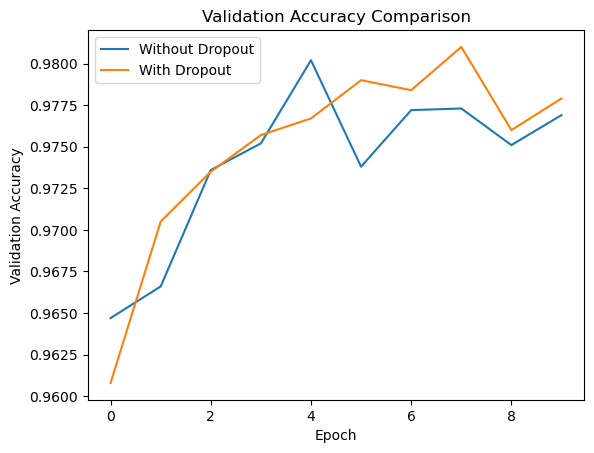

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the deep learning model without Dropout
model_without_dropout = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model without Dropout
model_without_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model without Dropout
history_without_dropout = model_without_dropout.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Define the deep learning model with Dropout
model_with_dropout = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model with Dropout
model_with_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with Dropout
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Compare model performance
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout')
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.show()

To discuss the considerations and tradeoffs when choosing the appropriate regularization technique for a given deep learning task:

- Task Complexity: For simpler tasks or smaller datasets, simpler regularization techniques like L2 regularization or early stopping may be sufficient. For complex tasks and large datasets, more advanced techniques like Dropout or Batch Normalization may be more effective.

- Model Size: Regularization techniques like Dropout may have a more significant impact on large models with many parameters. For smaller models, their effect might be less pronounced.

- Overfitting Severity: Consider how much overfitting the model experiences. If overfitting is significant, regularization can be helpful, but if it's not a major concern, simpler models without regularization may suffice.

- Resource Constraints: Some regularization techniques, like Dropout, can add computational overhead during training. Consider the available computational resources when choosing the appropriate regularization technique.

- Validation Performance: Evaluate the model's performance on a separate validation set to choose the regularization technique that results in the best tradeoff between model complexity and generalization.

- Hyperparameter Tuning: Some regularization techniques have hyperparameters that need to be tuned, like the dropout rate. Perform hyperparameter tuning to find the optimal configuration for the chosen regularization technique.

__Remember that the effectiveness of different regularization techniques can vary across different tasks and architectures. It's essential to experiment with different techniques and evaluate their impact on the model's performance to choose the most suitable one for a given deep learning task.__